In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
df_maquinas = pd.read_excel('/content/drive/MyDrive/I2A2_desafios/Defective_Equipment (rev 2024-02-21).xlsx')

df_maquinas.head()

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,475,135,458,509,469,336,492
1,2,57,73,47,53,63,63,62,58
2,3,245,227,267,242,271,268,219,286
3,4,1472,1582,1494,1462,1613,1490,1323,1493
4,5,105,103,66,103,118,101,98,118


In [ ]:
df_maquinas2 = df_maquinas.pivot_table(values=['V1','V2','V3','V4','V5','V6','V7','V8'], columns='Seq')

df_maquinas2.head()

Seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
V1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
V2,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
V3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
V4,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
V5,509,63,271,1613,118,55,207,139,1058,628,193,830,465,247,376,1734,167


In [ ]:
# Calculate the variance for each column in df_maquinas2
variances = df_maquinas2.var(axis=0)

# Find the columns with the highest variances
highest_variances = variances.sort_values(ascending=False).head(3)

# Print the columns with the highest variances
print("Columns with the highest variances:")
print(highest_variances)

# Count the number of sensors with activations much below the average for each column with the highest variances
for column in highest_variances.index:
  # Calculate the average for the column
  average = df_maquinas2[column].mean()

  # Count the number of sensors with activations much below the average
  count_below_average = len(df_maquinas2[df_maquinas2[column] < (average - 2 * variances[column])])

  # Print the results
  print(f"Column '{column}': {count_below_average} sensors with activations much below the average")


Columns with the highest variances:
Seq
10    44375.125
16    35522.500
9     23406.500
dtype: float64
Column '10': 0 sensors with activations much below the average
Column '16': 0 sensors with activations much below the average
Column '9': 0 sensors with activations much below the average


In [ ]:
average_activations = df_maquinas2.mean(axis=0)

# Identify equipment with activations significantly different from the average
significant_deviations = df_maquinas2[((df_maquinas2 - average_activations).abs() > 2 * df_maquinas2.std(axis=0)).any(axis=1)]

# Print the equipment with significant deviations
print("Equipment with significant deviations from the average activations:")
print(significant_deviations)


Equipment with significant deviations from the average activations:
Seq   1   2    3     4   5   6    7   8    9     10   11   12   13   14   15  \
V3   135  47  267  1494  66  41  209  93  674  1033  143  586  355  187  334   

Seq    16   17  
V3   1506  139  


In [ ]:
pca = PCA()
pca.fit(df_maquinas2)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
  print(f"Principal Component {i+1}: {variance:.2%}")


Principal Component 1: 48.58%
Principal Component 2: 30.87%
Principal Component 3: 16.82%
Principal Component 4: 3.04%
Principal Component 5: 0.44%
Principal Component 6: 0.24%
Principal Component 7: 0.01%
Principal Component 8: 0.00%


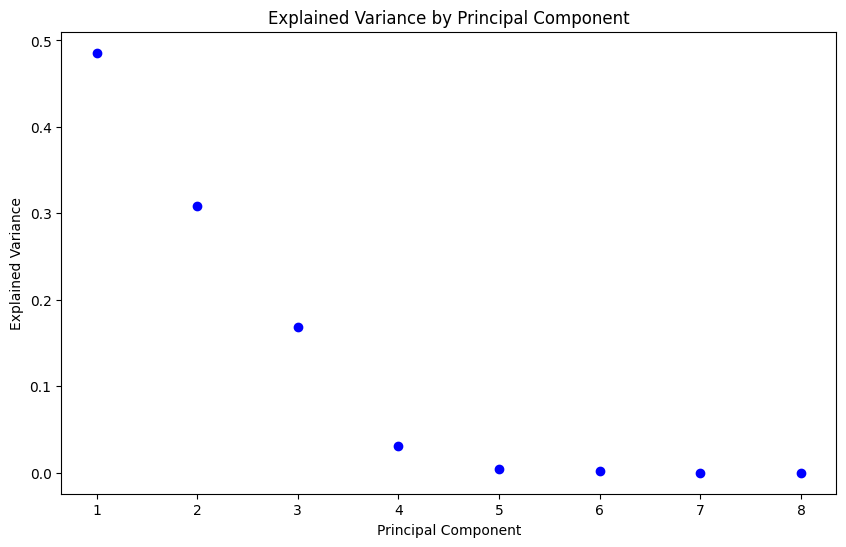

In [ ]:
# Create a scatter plot of the explained variance against the principal component number
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(explained_variance) + 1), explained_variance, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()


**Baseada na identificação dos equipamentos com ativações significativamente diferentes da média, o equipamento V3 apresenta a maior discrepância, podendo ser o equipamento com defeito**